In [17]:
!pip install -r /Users/guime/projects/SLTforSGD/code/requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ipykernel-6.29.3-py3-none-any.whl.metadata (6.3 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl.metadata (995 bytes)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached appnope-0.1.4-py2.py3-none-any.whl.metadata (908 bytes)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached debugpy-1.8.1-cp311-cp311-macosx_11_0_universal2.whl.metadata (1.1 kB)
  Using cached jupyter_client-8.6.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl.metadata (2.8 kB)
  Using cached nest_asyncio-1.6.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached pyzmq-25.1.2-cp311-cp311-macosx_10_15_universal2.whl.metadata (4.9 kB)
  Using cached tornado-6.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (2.5 kB)
  Using cached traitlets-5.14.2-py3-none-any.whl.metadata (10 

/var/folders/n_/j_84l0gd1_g29r9fv4nlbfph0000gn/T/ipykernel_27957/2218729967.py:23: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = min(1, likelihood(w_proposal, x, y) / likelihood(w_current, x, y))
/Users/guime/anaconda3/envs/SLTforSGD/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


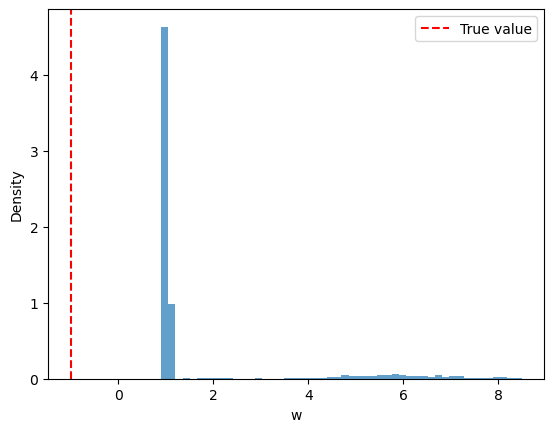

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data
def generate_data(w_true, n_samples):
    x = np.random.normal(0, 1, n_samples)
    y = (w_true - 1)**2 * (w_true + 1)**4 * x + np.random.normal(0, 0.1, n_samples)
    return x, y

# Likelihood function
def likelihood(w, x, y):
    y_pred = (w - 1)**2 * (w + 1)**4 * x
    return np.prod(norm.pdf(y, loc=y_pred, scale=0.1))

# Metropolis-Hastings algorithm
def metropolis_hastings(x, y, n_samples, proposal_std):
    w_samples = np.zeros(n_samples)
    w_current = np.random.uniform(-5, 5)  # Initialize with a random value
    
    for i in range(n_samples):
        w_proposal = np.random.normal(w_current, proposal_std)
        acceptance_ratio = min(1, likelihood(w_proposal, x, y) / likelihood(w_current, x, y))

        
        if np.random.rand() < acceptance_ratio:
            w_current = w_proposal
        
        w_samples[i] = w_current
    
    return w_samples

# Set up the problem
n_samples = 10000
w_true = -1
proposal_std = 0.1

# Generate synthetic data
x, y = generate_data(w_true, n_samples)

# Run Metropolis-Hastings algorithm
w_samples = metropolis_hastings(x, y, n_samples, proposal_std)

# Plot the results
plt.hist(w_samples, bins=50, density=True, alpha=0.7)
plt.axvline(w_true, color='r', linestyle='--', label='True value')
plt.xlabel('w')
plt.ylabel('Density')
plt.legend()
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.
There were 116 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


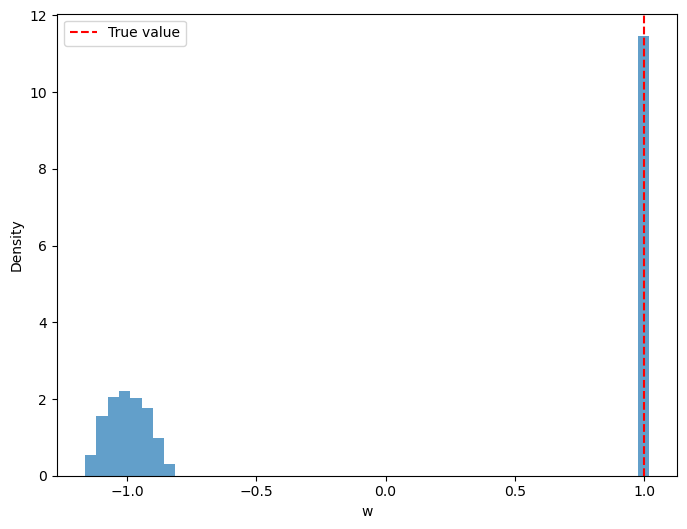

In [16]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data
def generate_data(w_true, n_samples):
    x = np.random.normal(0, 1, n_samples)
    y = (w_true - 2) * (w_true + 2)**2 * x + np.random.normal(0, 0.1, n_samples)
    return x, y

# Set up the problem
n_samples = 2000
w_true = 1

# Generate synthetic data
x, y = generate_data(w_true, n_samples)

# Define the model using PyMC3
with pm.Model() as model:
    # Prior distribution for w
    w = pm.Uniform('w', lower=-10, upper=10)
    
    # Likelihood function
    likelihood = pm.Normal('likelihood', mu=(w - 1)**2 * (w + 1)**4 * x, sigma=0.1, observed=y)
    
    # Perform MCMC sampling
    trace = pm.sample(2000, tune=1000, cores=1, random_seed=42)

# Extract the sampled values of w

w_samples = trace.posterior['w'].values.flatten()

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(w_samples, bins=50, density=True, alpha=0.7)
ax.axvline(w_true, color='r', linestyle='--', label='True value')
ax.set_xlabel('w')
ax.set_ylabel('Density')
ax.legend()
plt.show()

array([-1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84852507,
       -1.84852507, -1.84852507, -1.84852507, -1.84852507, -1.84